In [ ]:
# 📦 Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score




In [ ]:
from google.colab import files
uploaded = files.upload()


Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [ ]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# 👁️ Step 3: Quick View
print(df.head())
print(df.info())
# 🧼 Step 4: Data Preprocessing
df.drop('customerID', axis=1, inplace=True)  # drop unnecessary ID column
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # convert TotalCharges to numeric
df.dropna(inplace=True)  # remove missing rows

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [ ]:
# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [ ]:
# 🎯 Step 5: Feature Selection
X = df.drop('Churn', axis=1)  # features
y = df['Churn']               # target

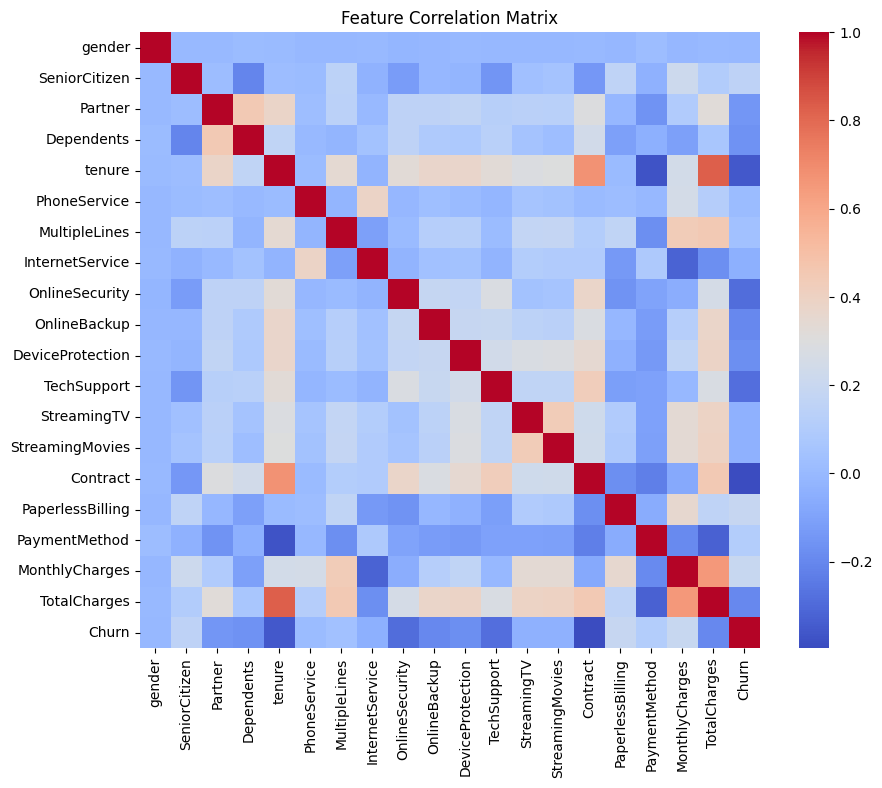

In [ ]:
# 📊 Optional: View feature correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Matrix")
plt.show()

In [ ]:
# 🧪 Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🧠 Step 7: Train the Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 📈 Step 8: Predictions and Evaluation
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7924662402274343

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407


Confusion Matrix:
 [[932 101]
 [191 183]]


In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Compare predictions
comparison = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

# Show first few results
print(comparison.head(10))


   Actual  Predicted
0       0          0
1       0          0
2       1          1
3       0          0
4       0          0
5       0          1
6       0          0
7       0          1
8       0          0
9       0          0


In [ ]:
# New customer example — make sure this has the same feature structure as training data
new_customer = pd.DataFrame([{
    'gender': 1,
    'SeniorCitizen': 0,
    'Partner': 1,
    'Dependents': 0,
    'tenure': 6,
    'PhoneService': 1,
    'MultipleLines': 0,
    'InternetService': 1,
    'OnlineSecurity': 0,
    'OnlineBackup': 1,
    'DeviceProtection': 1,
    'TechSupport': 0,
    'StreamingTV': 1,
    'StreamingMovies': 1,
    'Contract': 0,
    'PaperlessBilling': 1,
    'PaymentMethod': 2,
    'MonthlyCharges': 68.75,
    'TotalCharges': 412.5
}])

# Predict churn
prediction = model.predict(new_customer)
result = "Churn" if prediction[0] == 1 else "No Churn"
print("Predicted result for the new customer:", result)


Predicted result for the new customer: Churn


AUC Score: 0.81


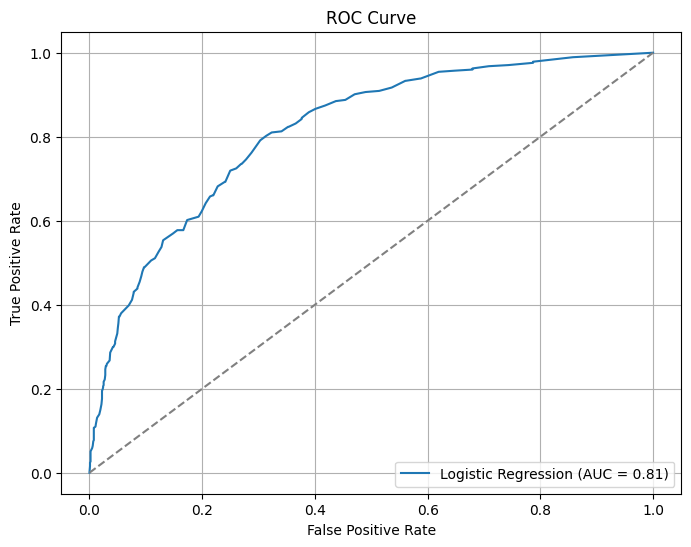

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities (not just classes)
y_prob = model.predict_proba(X_test)[:, 1]  # probability of the positive class

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score:.2f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
